<a href="https://colab.research.google.com/github/tgresearch/PlatzyCourses/blob/main/class10_platzyDLpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
## Class 9
```



In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F #capas sin parametros


In [10]:
class Net(nn.Module):
  #necesita 2 metodos (inicializacion y forward)
  def __init__(self, num_channels):
    super(Net,self).__init__()
    
    self.num_channels = num_channels

    self.conv1 = nn.Conv2d(3, self.num_chanels, 3, stride = 1, padding=1)
    self.conv2 = nn.Conv2d(self.num_channels, self.num_chanels*2, 3, stride = 1, padding=1)
    self.conv3 = nn.Conv2d(self.num_chanels*2, self.num_chanels*4, 3, stride = 1, padding=1)

    self.fc1 = nn.Linear(self.num_channels*4*8*8, self.num_channels*4)
    self.fc2 = nn.Linear(self.num_channels*4, 6)

    def forward(self,x):
      #empieza con images 3x64x64
      x = self.conv1(x) #num_channels x 64 x 64
      x = F.relu(F.max_pool2d(x,2)) #num_channels x 32 x 32
      x = self.conv2(x) #num_Channels*2 x 32 x32
      x = F.relu(F.max_pool2d(x,2)) #num_channels*2 x 16 x 16
      x = self.conv3(x) #num_Channels*4 x 16 x 16
      x = F.relu(F.max_pool2d(x,2)) #num_channels*4 x 8 x 8

      #flatten usar metodo view
      x = x.view(-1, self.num_channels*4*8*8)

      #fc
      x = self.fc(x)
      x = F.ralu(x)
      x = self.fc2(x)

      #log_softmax
      x = F.log_softmax(x, dim=1)
      
      return x


In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
!ls '/gdrive/My Drive/dl-pytorch/datasets/64x64_SIGNS'

test_signs  train_signs  val_signs


In [5]:
import sys
sys.path.append('/gdrive/My Drive/dl-pytorch/')

In [6]:
from plot_helpers import imshow

In [30]:
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader

class SIGNSDataset(Dataset):
  def __init__(self, base_dir, split='train',transform=None):
    path = os.path.join(base_dir, "{}_signs".format(split))
    files = os.listdir(path)

    self.filenames = [os.path.join(path,f) for f in files if f.endswith(".jpg")]

    self.targets = [int(f[0]) for f in files]
    self.transform = transform
  
  def __len__(self):
    return len(self.filenames)

  def __getitem__(self,idx):
    image = Image.open(self.filenames[idx])
    if self.transform:
      image = self.transform(image)
    return image, self.targets[idx]



In [31]:
signs = SIGNSDataset('/gdrive/My Drive/dl-pytorch/datasets/64x64_SIGNS', split='train')

In [22]:
len(signs)

864

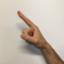

In [32]:
signs[0][0]